# Sample of plots for converted umnsaa_pc20060515

Cartopy packages for map plotting

Matplotlib packages for other plotting

Add some plotting config and the locations of data files here

In [1]:
# Show plots in the browser
#%matplotlib inline
%matplotlib notebook

import matplotlib as mpl
import matplotlib.colors as col
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import matplotlib.patches as mpatches
import numpy as np
from netCDF4 import Dataset
# mapping libraries
import cartopy
import cartopy.feature as cpf
# geometry to add onto cartopy
import shapely.geometry as sgeom
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.transforms import offset_copy

# helper package for dealing with indices or cross sections etc
# repeated stuff in this notebook will probably be refactored to the utils or plotting package
from utilities import utils, fio, constants, plotting

# Plot defaults
plotting.init_plots()

# Projection used in cartopy
proj = cartopy.crs.PlateCarree()

# Create a Stamen terrain background instance.
stamen_terrain = cimgt.Stamen('terrain-background')

# Regions and locations
extents = plotting._extents_
latlons = plotting._latlons_
transects = plotting._transects_

### Look at cloud parameters

#### Relative humidity

Specific humidity is available from model output, this is converted to an approximation of relative humidity using temperature and pressure.

#### Water+ice content

Straight from model output

##### Any way to add the F160 here?

TODO for later, maybe replace wind contourf with skew t log p plot

<IPython.core.display.Javascript object>


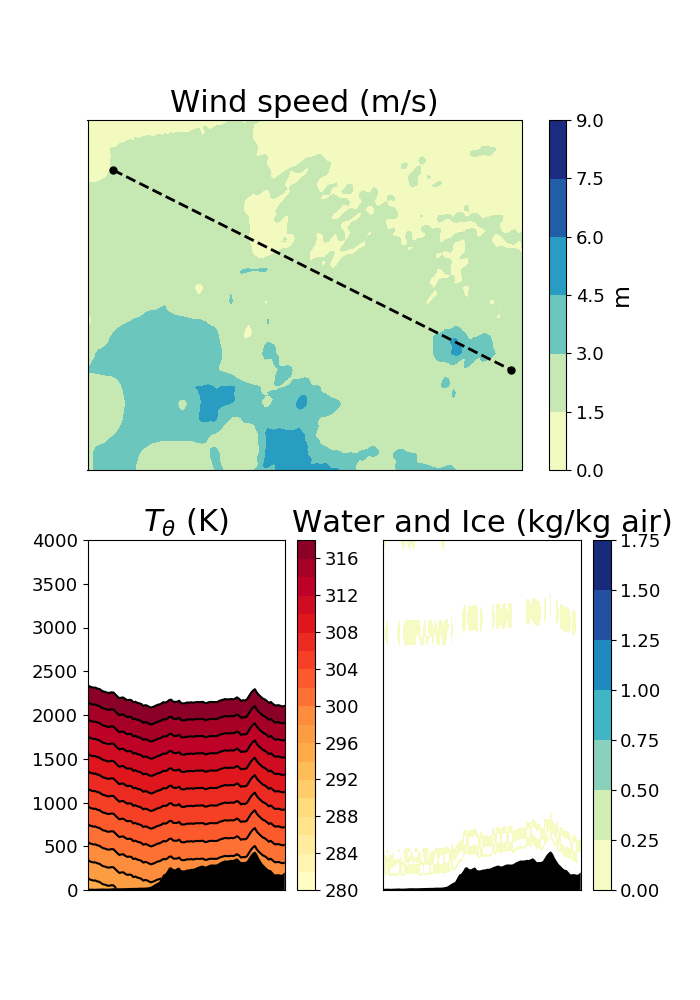

In [5]:
start,end = transects['waroona1']
npoints = 100

# Pull out cross section of topography and height
slicetopog = utils.cross_section(topog,latt,lont,start,end,npoints=npoints)
xticks,xlabels = utils.cross_section_ticks_labels(start,end)
xaxis=np.linspace(0,1,npoints)
slicex=np.tile(xaxis,(nz,1))


## Image showing topography (with wind speeds?) and transects of vert motion and wind speed
plt.close()
waroona=plotting._extents_['waroona']
f = plt.figure(figsize=[7,10])

ax1 = plt.subplot(2,1,1)
# Wind speed contour, very similar to topography just with different expected values and colour map
smap = plt.cm.get_cmap('YlGnBu')
plotting.map_contourf(waroona,s[0],lat,lon,cmap=smap,clabel='m/s')
plt.
# add waroona, yarloop, fire start
plotting.map_add_locations(['waroona','yarloop'], text=['Waroona', 'Yarloop'], textcolor='white')
plotting.map_add_locations(['fire_waroona'],text = ['Fire start'], marker='*', textcolor='white')

plt.title('Wind speed (m/s)')
# start to end x=[lon0,lon1], y=[lat0, lat1]
plt.plot([start[1],end[1]],[start[0],end[0], ], '--k', 
         linewidth=2, marker='o', markersize=5)

ax2 = plt.subplot(2,2,3)
plotting.transect_theta(theta,zth,lat,lon,start,end,topog=topog,latt=latt,lont=lont)

ax3 = plt.subplot(2,2,4)
plotting.transect_qc(qc,zth,lat,lon,start,end,topog=topog,latt=latt,lont=lont)
plt.yticks([])

plt.show()

## Time series

1. pull out data points over time
 - pressure
 - temperature
 - wind speed
 - wind direction (arc tan y/x)
2. overplotted with data from AWS when possible


In [1]:
from utilities import fio,utils

data=fio.read_waroona(fio._files_waroona_old_,
                      old=True, 
                      keepvars=['air_pressure','air_temperature','air_temperature_0','x_wind','y_wind'])
print(data['air_pressure'].shape)
lats=data['latitude']
lons=data['longitude']

# Pull out data at one latlon
compare_point = latlons['fire_waroona']
lati,loni = utils.lat_lon_index(compare_point[0],compare_point[1],lats,lons)

# datetime array for x axis
datetimes=utils.date_from_gregorian(data['time'])
print(datetimes)

# pull out the bits we want
p=data['air_pressure'][:,0,lati,loni]

INFO: Reading  data/waroona/umnsaa_pc2016010515.nc  ... 
INFO: finished reading  data/waroona/umnsaa_pc2016010515.nc
INFO: Reading  data/waroona/umnsaa_pc2016010516.nc  ... 
INFO: finished reading  data/waroona/umnsaa_pc2016010516.nc
DEBUG: air_temperature (1, 400, 400) (1, 400, 400)
DEBUG: air_temperature (2, 400, 400)


KeyError: 'air_temperature_0'